In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images,train_labels),(test_images,test_labels)  = datasets.cifar10.load_data()

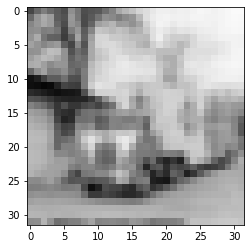

In [3]:
plt.imshow(train_images[1262,])

In [4]:
select_rate = 0.2
train_idx = np.random.permutation(np.arange(train_images.shape[0]))
train_idx = train_idx[:round(train_idx.shape[0]*select_rate)]
train_images,train_labels = train_images[train_idx,],train_labels[train_idx,]
test_idx = np.random.permutation(np.arange(test_images.shape[0]))
test_idx = test_idx[:round(test_idx.shape[0]*select_rate)]
test_images,test_labels = test_images[test_idx,],test_labels[test_idx,]
train_images,test_images = train_images/255.0,test_images/255.0
(train_images.shape,train_labels.shape,test_images.shape,test_labels.shape)

((10000, 32, 32, 3), (10000, 1), (2000, 32, 32, 3), (2000, 1))

In [5]:
model = models.Sequential()
model.add(layers.RandomFlip("horizontal",input_shape=(32,32,3)))
model.add(layers.RandomRotation(0.1))
model.add(layers.RandomZoom(0.1))
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))
#model.summary()

In [6]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(True),
             metrics=['accuracy']
             )
history = model.fit(train_images,train_labels,batch_size=32,epochs=20,validation_data=(test_images,test_labels))
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)

Epoch 1/200
313/313 [==============================] - 16s 44ms/step - loss: 1.9993 - accuracy: 0.2545 - val_loss: 1.6905 - val_accuracy: 0.3670
Epoch 2/200
313/313 [==============================] - 13s 42ms/step - loss: 1.7128 - accuracy: 0.3748 - val_loss: 1.7355 - val_accuracy: 0.3905
Epoch 3/200
313/313 [==============================] - 11s 36ms/step - loss: 1.5978 - accuracy: 0.4187 - val_loss: 1.6304 - val_accuracy: 0.4210
Epoch 4/200
313/313 [==============================] - 12s 38ms/step - loss: 1.5310 - accuracy: 0.4436 - val_loss: 1.5425 - val_accuracy: 0.4400
Epoch 5/200
313/313 [==============================] - 12s 37ms/step - loss: 1.4907 - accuracy: 0.4579 - val_loss: 1.4258 - val_accuracy: 0.4830
Epoch 6/200
313/313 [==============================] - 12s 37ms/step - loss: 1.4162 - accuracy: 0.4909 - val_loss: 1.5581 - val_accuracy: 0.4570
Epoch 7/200
313/313 [==============================] - 11s 37ms/step - loss: 1.3931 - accuracy: 0.4945 - val_loss: 1.3772 - val_ac

313/313 [==============================] - 18s 56ms/step - loss: 0.8562 - accuracy: 0.6959 - val_loss: 1.1260 - val_accuracy: 0.6220
Epoch 58/200
313/313 [==============================] - 18s 58ms/step - loss: 0.8634 - accuracy: 0.6899 - val_loss: 1.1381 - val_accuracy: 0.6270
Epoch 59/200
313/313 [==============================] - 18s 56ms/step - loss: 0.8718 - accuracy: 0.6908 - val_loss: 1.0917 - val_accuracy: 0.6150
Epoch 60/200
313/313 [==============================] - 19s 59ms/step - loss: 0.8577 - accuracy: 0.6919 - val_loss: 1.1371 - val_accuracy: 0.6210
Epoch 61/200
313/313 [==============================] - 18s 57ms/step - loss: 0.8553 - accuracy: 0.6970 - val_loss: 1.1785 - val_accuracy: 0.6185
Epoch 62/200
313/313 [==============================] - 17s 56ms/step - loss: 0.8485 - accuracy: 0.6963 - val_loss: 1.2181 - val_accuracy: 0.5985
Epoch 63/200
313/313 [==============================] - 18s 58ms/step - loss: 0.8494 - accuracy: 0.6982 - val_loss: 1.1444 - val_accuracy

313/313 [==============================] - 17s 55ms/step - loss: 0.7146 - accuracy: 0.7458 - val_loss: 1.1965 - val_accuracy: 0.6295
Epoch 114/200
313/313 [==============================] - 18s 59ms/step - loss: 0.7271 - accuracy: 0.7406 - val_loss: 1.2749 - val_accuracy: 0.6035
Epoch 115/200
313/313 [==============================] - 18s 56ms/step - loss: 0.7165 - accuracy: 0.7452 - val_loss: 1.2058 - val_accuracy: 0.6205
Epoch 116/200
313/313 [==============================] - 20s 64ms/step - loss: 0.7010 - accuracy: 0.7500 - val_loss: 1.2138 - val_accuracy: 0.6245
Epoch 117/200
313/313 [==============================] - 18s 56ms/step - loss: 0.7099 - accuracy: 0.7473 - val_loss: 1.1932 - val_accuracy: 0.6345
Epoch 118/200
313/313 [==============================] - 18s 58ms/step - loss: 0.7206 - accuracy: 0.7421 - val_loss: 1.2564 - val_accuracy: 0.6115
Epoch 119/200
313/313 [==============================] - 18s 59ms/step - loss: 0.7284 - accuracy: 0.7423 - val_loss: 1.2377 - val_ac

KeyboardInterrupt: 

In [7]:
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.title('history accuracy')
plt.show()

NameError: name 'history' is not defined